C:\Users\felip\AppData\Local\Temp\ipykernel_11364\2323856616.py:8: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load('segmented_files/segmento_50.mpeg')
c:\Users\felip\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


135.99917763157896


c:\Users\felip\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=927
  warnings.warn(
c:\Users\felip\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=464
  warnings.warn(
c:\Users\felip\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=232
  warnings.warn(
c:\Users\felip\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=116
  warnings.warn(
c:\Users\felip\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=58
  warnings.warn(


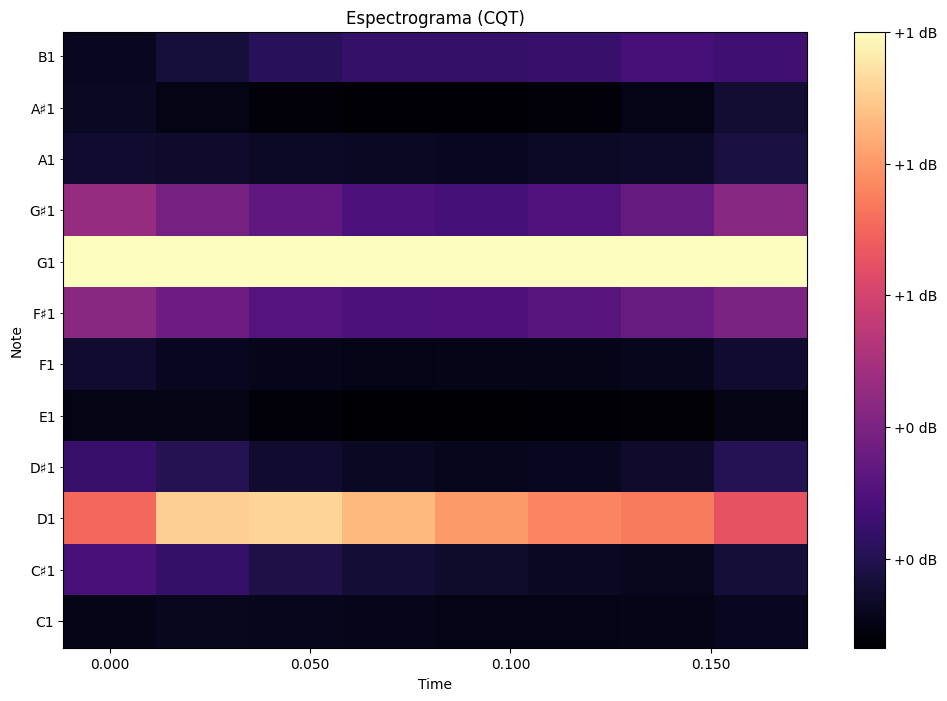

c:\Users\felip\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=256 is too large for input signal of length=232
  warnings.warn(
c:\Users\felip\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=256 is too large for input signal of length=116
  warnings.warn(
c:\Users\felip\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=256 is too large for input signal of length=58
  warnings.warn(


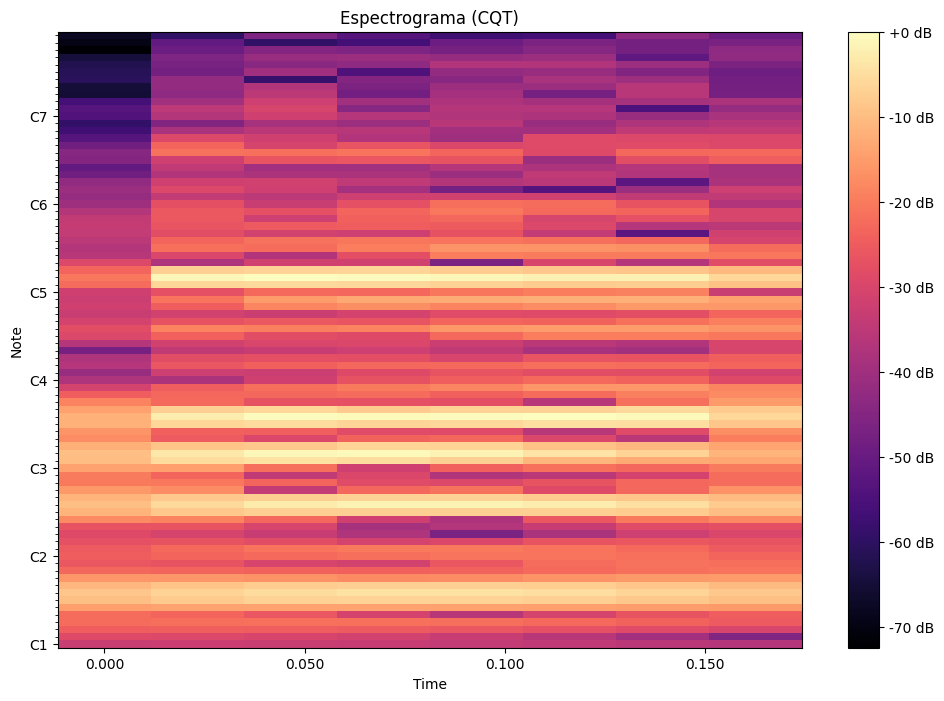

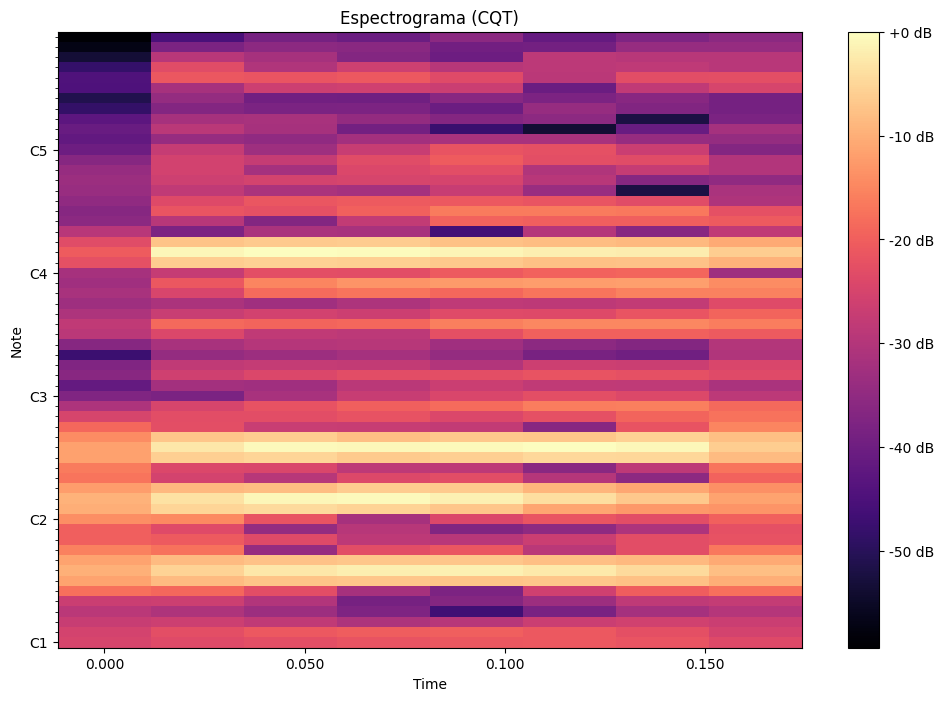

G
D
G
D
B
G
B
F#
C#
[[19, -22.960606], [38, -33.703236], [7, -37.372192], [14, -38.983177], [35, -133.42372], [31, -146.87079], [23, -166.6119], [42, -172.25816], [1, -178.39812]]


In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Acordes: Am F C G

#tentar 50
y, sr = librosa.load('segmented_files/segmento_50.mpeg')

'''sample rate, que se refere à taxa de amostragem do áudio. 
A taxa de amostragem é o número de amostras de áudio coletadas 
por segundo quando o áudio é convertido de uma forma analógica 
para uma forma digital'''

# Set the hop length; at 22050 Hz, 512 samples ~= 23ms
hop_length = 512 # 512 é uma potencia de 2 e facilita a transformada de fourier

y_harmonic, y_percussive = librosa.effects.hpss(y)

#Identificando o andamento
tempo, beat_frames = librosa.beat.beat_track(y=y_percussive, sr=sr)
print(tempo)

# Compute MFCC features from the raw signal
# MFCC é uma tabela da distribuições das frequencias pelo tempo
mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, n_mfcc=13)


n_frames = mfcc.shape[1]  # Assumindo que mfcc.shape[0] é o número de coeficientes
width = n_frames if n_frames % 2 else n_frames - 1  # A largura deve ser um número ímpar

# the first-order differences (delta features)
mfcc_delta = librosa.feature.delta(mfcc, width = width)

# Stack and synchronize between beat events
beat_mfcc_delta = librosa.util.sync(np.vstack([mfcc, mfcc_delta]),
                                    beat_frames)

# Compute lista features from the harmonic signal
# Transforma cada faixa de frequencia em notas musicais
chromagram = librosa.feature.chroma_cqt(y=y_harmonic,
                                        sr=sr)
# Aggregate lista features between beat events
# We'll use the median value of each feature between beat frames
beat_lista = librosa.util.sync(chromagram,
                                beat_frames,
                                aggregate=np.median)

# stack all beat-synchronous features together
beat_features = np.vstack([beat_lista, beat_mfcc_delta])

#Aplicando a transformada de fourier no segmento harmonico
D = np.abs(librosa.stft(y_harmonic))

# transformando a amplitude do sinal em decibeis
DB = librosa.amplitude_to_db(D, ref=np.max)

# Plot o espectrograma com o lista_cqt
plt.figure(figsize=(12, 8))
librosa.display.specshow(chromagram, sr=sr, x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma (CQT)')
plt.show()



# Calcule o CQT (Constant-Q transform)
C = librosa.amplitude_to_db(np.abs(librosa.cqt(y_harmonic, sr=sr)), ref=np.max)

# Plot o espectrograma com o cqt
plt.figure(figsize=(12, 8))
librosa.display.specshow(C, sr=sr, x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma (CQT)')
plt.show()


C2 = C[12:-12]
# Plot o espectrograma com o cqt
plt.figure(figsize=(12, 8))
librosa.display.specshow(C2, sr=sr, x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma (CQT)')
plt.show()


def identifica_picos(lista):

    n1, n2, n3 = 0, 1, 2
    picos_notas = []

    #and lista[n2] > -130
    # verifica de 3 em 3, procurando picos
    while n3 < len(lista) :

        # testa se há a condição de pico e se atende a quantidade mínima de decibeis
        if lista[n1] < lista[n2] > lista[n3] and lista[n2] > -190:
            picos_notas.append([n2, lista[n2]])

            if n2 ==30:
                print(lista[n1], lista[n2], lista[n3])

        n1, n2, n3 = n1+1, n2+1, n3+1

    # ordena com base no volume
    picos_notas = sorted(picos_notas, key=lambda x: x[1], reverse=True)

    return picos_notas



def identifica_fundamental(lista):

    #critério de seleção: linha com o maior valor
    linhas_somadas = np.sum(lista, axis=1)

    # argsort() retorna os índices que ordenariam um array.
    # [-2:] pega os dois últimos índices, que correspondem às maiores somas
    #i_maiores_somas = np.argsort(linhas_somadas)[-15:]
    
    picos_notas = identifica_picos(linhas_somadas)

    notas_musicais = {
    0: "C",
    1: "C#",
    2: "D",
    3: "D#",
    4: "E",
    5: "F",
    6: "F#",
    7: "G",
    8: "G#",
    9: "A",
    10: "A#",
    11: "B"
    }

    array_notas = []

    for i in picos_notas:
        nota = notas_musicais[i[0]%12]
        print(nota)
        array_notas.append(nota)

    print(picos_notas)
    return array_notas
    


array_notas = identifica_fundamental(C2)


Pegar a fundamental e a quinta, sempre entre as mais fortes e depois, com base nisso, verificar se a terça está presente

In [90]:
print(array_notas)

['G', 'D', 'G', 'D', 'B', 'G', 'B', 'F#', 'C#']


In [10]:
from music21 import *

chord6 = chord.Chord(['G', 'D', 'G', 'D', 'B', 'G', 'B', 'F#']
)
print(chord6.root()) 
print(chord6.commonName)

G
major seventh chord


In [8]:
str(chord6.root())

'A'

In [20]:
from music21 import *

chord1 = chord.Chord(['D', 'G', 'B'])
chord2 = chord.Chord(['D', 'G', 'B-'])
chord3 = chord.Chord(['G', 'A#', 'D'])
chord4 = chord.Chord(['D', 'G', 'B', 'D', 'G'])
chord5 = chord.Chord(['D', 'G', 'D', 'G', 'G', 'B', 'C#', 'F#', 'D', 'G', 'B', 'D'])




In [22]:
print(chord1.isTriad()) 
print(chord2.isTriad()) 
print(chord3.isTriad()) 
print(chord4.isTriad()) 

print(chord5.isDominantSeventh())

True
True
False
True
False


In [23]:
print(chord5.root()) 

G


In [25]:
print(chord5.commonName)

major seventh chord


In [92]:
C2

array([[-24.883005  , -23.484339  , -22.712393  , -21.93435   ,
        -21.183249  , -20.95732   , -21.69159   , -23.703999  ],
       [-25.258875  , -22.72543   , -21.047054  , -20.154833  ,
        -20.129465  , -20.987148  , -22.671106  , -25.424204  ],
       [-27.165565  , -26.633167  , -28.194172  , -30.891842  ,
        -29.642038  , -26.757444  , -25.827417  , -26.79281   ],
       [-29.078009  , -30.653748  , -33.328896  , -37.536938  ,
        -46.655907  , -38.424908  , -32.18289   , -29.682972  ],
       [-26.753733  , -26.635614  , -30.173988  , -38.868237  ,
        -36.640125  , -33.354637  , -28.44352   , -27.657164  ],
       [-17.730259  , -18.789665  , -23.14007   , -31.956087  ,
        -37.775654  , -25.978386  , -20.181532  , -17.82635   ],
       [-11.521156  ,  -8.400992  ,  -7.2157173 ,  -7.170864  ,
         -7.2272882 ,  -7.124693  ,  -7.7576513 , -10.02188   ],
       [ -9.865669  ,  -5.512085  ,  -3.0081608 ,  -1.9279602 ,
         -1.8481233 ,  -2.6141388